# Introduction to Scikit-learn (sklearn)

This notebook demonstrates some of the most udeful function of the scikit-learn Lbrary

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Evaluating a model
4. Improve a Model
5. Save and load a trained model
6. Putting it all together

## 0. An end-to-end Scikit learn Workflow

In [108]:
# 1. Get the data ready
import pandas as pd #Type:Ignore
import numpy as np #Type:Ignore

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [109]:
# Create X (features Matrix)
X = heart_disease.drop("target", axis = 1)

# Create y (labels)
Y = heart_disease["target"]

In [110]:
import warnings
warnings.filterwarnings('default')

In [111]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# WE'll keep the default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [112]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
executable: c:\Users\Paras\AppData\Local\Programs\Python\Python312\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.5.0
          pip: 24.0
   setuptools: 70.0.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.9.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: C:\Users\Paras\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: SkylakeX

       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: C:\Users\Paras\AppData\Loca

In [113]:
#3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [114]:
clf.fit(X_train, y_train);

In [115]:
# Make a prediction 
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [116]:
# 4. Evaluate the Model on the training data and test data
clf.score(X_train, y_train)

1.0

In [117]:
clf.score(X_test, y_test)

0.819672131147541

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.85      0.83      0.84        35

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [119]:
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 6, 29]], dtype=int64)

In [120]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [121]:
# 5. Improve a model
# Try different amount of n_estimation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model Accuracy on the test set: {clf.score(X_test, y_test)* 100:2f}%")

Trying model with 10 estimators...
Model Accuracy on the test set: 80.327869%
Trying model with 20 estimators...
Model Accuracy on the test set: 81.967213%
Trying model with 30 estimators...
Model Accuracy on the test set: 78.688525%
Trying model with 40 estimators...
Model Accuracy on the test set: 83.606557%
Trying model with 50 estimators...
Model Accuracy on the test set: 86.885246%
Trying model with 60 estimators...
Model Accuracy on the test set: 85.245902%
Trying model with 70 estimators...
Model Accuracy on the test set: 81.967213%
Trying model with 80 estimators...
Model Accuracy on the test set: 81.967213%
Trying model with 90 estimators...
Model Accuracy on the test set: 83.606557%


In [122]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_1.pkl", "wb"))

C:\Users\Paras\AppData\Local\Temp\ipykernel_18884\1391957294.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_1.pkl'>
  pickle.dump(clf, open("random_forest_1.pkl", "wb"))


In [123]:
loaded_model = pickle.load(open("random_forest_1.pkl", 'rb'))
loaded_model.score(X_test, y_test)

# the above line of code is correct. We just commented it to remove the small text we get above the output

# with open("random_forest_1.pkl", 'rb') as pickle_file:
#     loaded_model = pickle.load(pickle_file)

C:\Users\Paras\AppData\Local\Temp\ipykernel_18884\1909202393.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_1.pkl'>
  loaded_model = pickle.load(open("random_forest_1.pkl", 'rb'))


0.8360655737704918

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features ad labels(usually 'X' and 'y')
    2. Filling or disregarding missing values
    3. Converting non-numerical values to numerical values

In [124]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [126]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [127]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size= 0.2)

In [128]:
X_train.shape, y_train.shape

((242, 13), (242,))

In [129]:
X_test.shape, y_test.shape

((61, 13), (61,))

In [130]:
X.shape , y.shape

((303, 13), (303,))

In [131]:
# It is not necessary to have a huge amount of data.

# if we are able to achieve the same efficieny with a smaller amount of data then we will prefer to do so. Because hughe amount of data increases the cost involved in the process

### 1.1 Make sure it is all numerical

In [132]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [133]:
len(car_sales)

1000

In [134]:
car_sales['Doors'].value_counts()
# Hence this also comes under categorial classification

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [135]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [136]:
#Split into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales['Price']

# SPlit into training and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [137]:
# By building machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", One_hot, categorial_features)], remainder="passthrough")

transformered_X = transformer.fit_transform(X)
transformered_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
pd.DataFrame(transformered_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [ ]:
# Let's try refitting the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformered_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values

1. Fill them with some value (Also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
# Importcar-sales-missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
#Create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales["Price"]

In [ ]:
# Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([["one_hot", one_hot, categorial_features]], remainder="passthrough")

transformered_X = transformer.fit_transform(X)
transformered_X

# It is important to note here that, even though there some values missing in the dataframe, due to the recent update it is getting ignored. 

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make"column
# car_sales_missing["Make"].fillna("missing", inplace=True)

car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

# Fill the "Colour" colums
# car_sales_missing["Colour"].fillna("missing", inplace= True)

car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill the "Odometer (KM)" column

# car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)


# The above line of code will not function after Pandas 3.0. Hence we have commented it out.

car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

#Fills the "Doors" Columns
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [ ]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [ ]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
len(car_sales_missing)

950

In [ ]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorial_features)], remainder="passthrough")

transformered_X = transformer.fit_transform(car_sales_missing)
transformered_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit Learn

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
#Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#SPlit into  X and  y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [143]:
# Fill missing values with Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with the mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# .fit_transorm and .transform are different methods of performing imputation

# Check filled X_train
filled_X_train


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [144]:
car_sales_filled_training = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_testing = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_testing.isna().sum(), car_sales_filled_training.isna().sum()

(Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64,
 Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64)

In [145]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformered_X_training = transformer.fit_transform(car_sales_filled_training)
transformered_X_testing = transformer.transform(car_sales_filled_testing)

transformered_X_testing.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 9.97610e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.79750e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.97664e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.08569e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.01190e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.11630e+04]])

In [147]:
# Now we've got our data as numbers and filled (no missing values)

# Let's fit a model

model = RandomForestRegressor()
model.fit(transformered_X_training, y_train)
model.score(transformered_X_testing, y_test)


0.21735623151692096

## 2. Choosing the right estimator/algorithm for your problems

Some things to note: 

* sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart diesease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as classification estimator.
* Regression problem - predicting a number (Seeling price of a car)

In [148]:
from IPython.display import Image

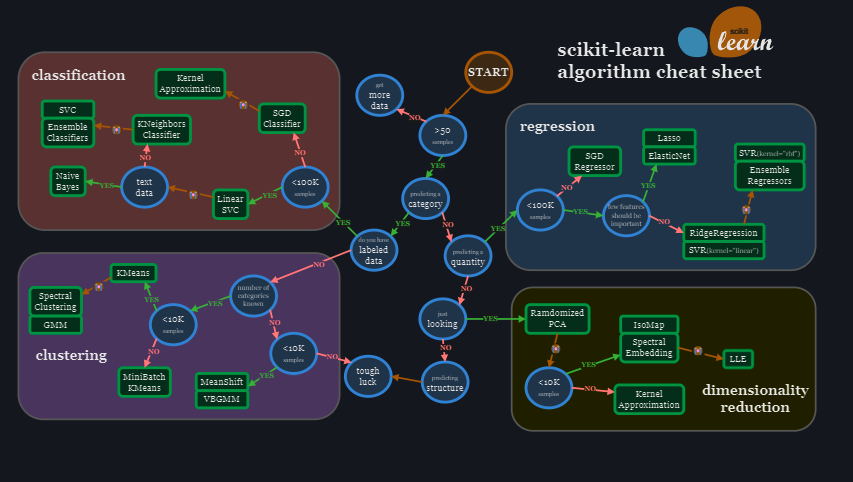

In [150]:
Image(filename ='Choosing-the-right-estimator.png')

# Refer to this image whenever you are not sure what model to use implement machine learning

### 2.1 Picking a machine learning mode for a regression model

Let's use the California Housing Dataset


In [152]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [156]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [158]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [160]:
housing_df = housing_df.drop("MedHouseVal", axis = 1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [161]:
# Import algorithm
from sklearn.linear_model import Ridge
model = Ridge()

#Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# SPlit into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.5758549611440127

What if 'Ridge' didnt work and the score didnt fit our requirements

In [162]:
# Self PRactice
# In the given model we have observed that the performance of machine learning model reduces significantly. So choosing the new model will not be a good choice.

from sklearn.linear_model import Lasso
model = Lasso()

#Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# SPlit into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.2841671821008396

In [163]:
# Import the Random Forest Regressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup the random seed
np.random.seed(42)

# Create the data
X = housing_df.drop(["target"], axis = 1)
y = housing_df["target"]

# SPlit into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create randomforest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification model